In [5]:
from fastai.vision.widgets import *

In [4]:
import fastbook
fastbook.setup_book()

In [7]:
from fastbook import *

In [8]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [9]:
ims = search_images_ddg('grizzy bear')
len(ims)

200

In [10]:
dest = 'images/grizzly.jpg'
download_url(ims[0],dest)

Path('images/grizzly.jpg')

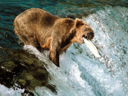

In [11]:
im = Image.open(dest)
im.to_thumb(128,128)

In [12]:
bear_types = 'grizzly','black','teddy'
path = Path("bears")

In [13]:

if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bear')
        download_images(dest,urls=results)

In [14]:
fns = get_image_files(path)
fns

(#436) [Path('bears/black/004b7d85-5072-4d47-88f0-296f617e559c.jpeg'),Path('bears/black/01220b5e-c432-41f8-a3e9-6f380583c3d3.jpg'),Path('bears/black/02e31c08-919c-403e-bd50-1b7d64a7643f.jpg'),Path('bears/black/04e6f80b-b939-4f2e-ae3d-24cb33268416.jpg'),Path('bears/black/05176fa9-a9c5-4bd8-b268-a1167cf114e2.jpg'),Path('bears/black/0753f95a-f79a-4dd3-9f57-18715947ffb7.jpg'),Path('bears/black/0755d25c-3cad-4341-81d3-3292de7b04c2.jpg'),Path('bears/black/09a1c912-225a-469e-899f-d6c881c1db20.jpg'),Path('bears/black/0dc4f0a4-0d3d-4076-b552-7787a6d80809.jpg'),Path('bears/black/0e37f81e-c973-428e-b2da-5083494db703.jpg')...]

In [15]:
failed = verify_images(fns)
failed

(#17) [Path('bears/black/22e2b8f1-6099-4ed4-ab7c-b7fbd18dd642.jpg'),Path('bears/black/25afd44c-09fa-4962-8ac0-cb19fa4f8551.png'),Path('bears/black/369346a2-92cd-4fc1-acdf-e9eb29026bb3.jpg'),Path('bears/black/98d5e15d-9154-4fdb-aecc-35eb51d56ba2.jpg'),Path('bears/black/9b80aac3-9c42-45f1-88f2-d548b4c2a423.jpg'),Path('bears/black/a021e2fd-3e33-44d4-9c2e-bf8527b1b345.jpg'),Path('bears/black/bfed1756-37cf-4186-8446-c03d824092ac.jpg'),Path('bears/black/e01e809e-7b34-4bf8-b331-e1098c8c48dd.jpg'),Path('bears/grizzly/72a82f29-d176-4447-8093-37e6cc1e8da9.jpg'),Path('bears/grizzly/8c89013f-4ec7-48c3-b9fa-0b719b5c9756.jpg')...]

In [16]:
failed.map(Path.unlink)

(#17) [None,None,None,None,None,None,None,None,None,None...]

In [17]:
bears = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2,seed=42),
    get_y = parent_label,
    item_tfms=Resize(128)
)

In [21]:
dls = bears.dataloaders(path)

C:\Users\achar\anaconda3\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


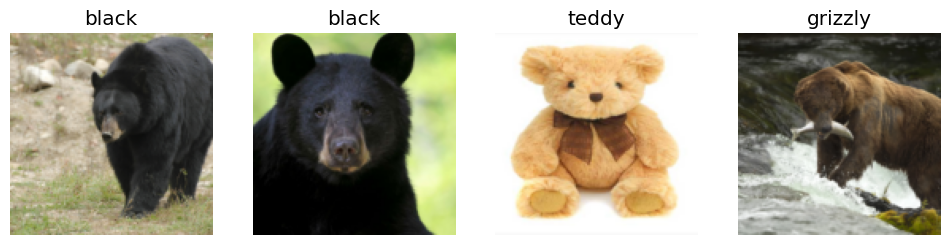

In [22]:
dls.valid.show_batch(max_n=4,nrows=1)

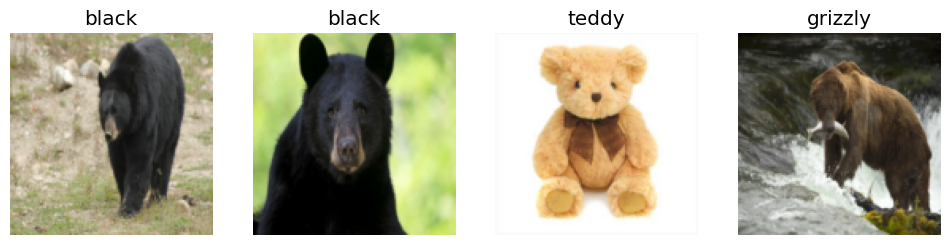

In [23]:
bears = bears.new(item_tfms=Resize(128,ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

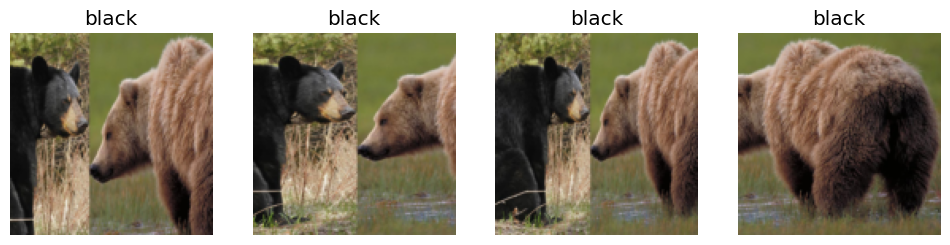

In [24]:
bears = bears.new(item_tfms=RandomResizedCrop(128,min_scale=0.3))
dls=bears.dataloaders(path)
dls.train.show_batch(max_n=4,nrows=1,unique=True)

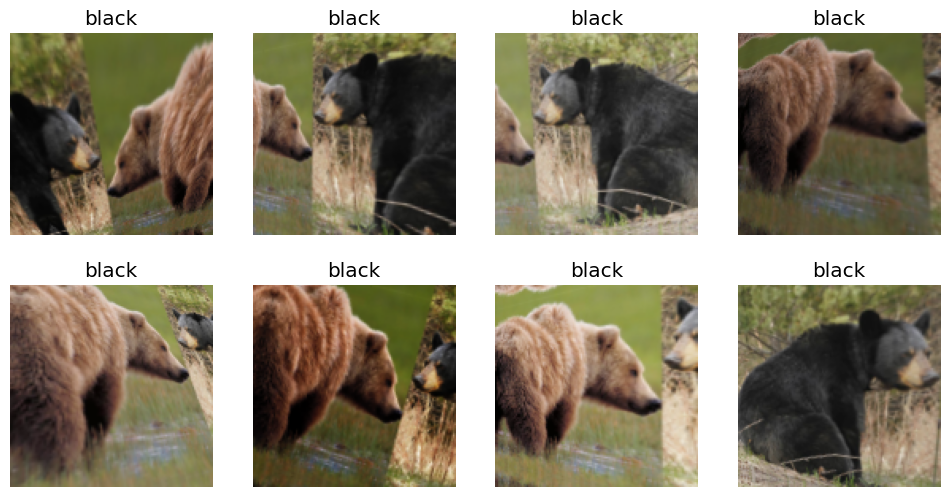

In [26]:
bears = bears.new(item_tfms = Resize(128),batch_tfms=aug_transforms(mult=2)
)
dls=bears.dataloaders(path)
dls.train.show_batch(max_n=8,nrows=2,unique=True)

In [28]:
bears = bears.new(
    item_tfms = RandomResizedCrop(224,min_scale=0.5),
    batch_tfms=aug_transforms())
dls=bears.dataloaders(path)

In [29]:
learn=vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\achar/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|█████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:04<00:00, 10.5MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.587885,0.494683,0.144578,00:44


epoch,train_loss,valid_loss,error_rate,time
0,0.445811,0.287122,0.084337,00:51
1,0.397809,0.251099,0.036145,00:59
2,0.314849,0.238843,0.036145,00:49
3,0.267300,0.226903,0.036145,00:46


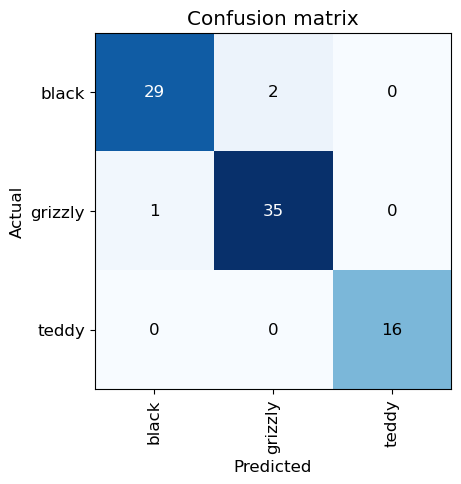

In [31]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

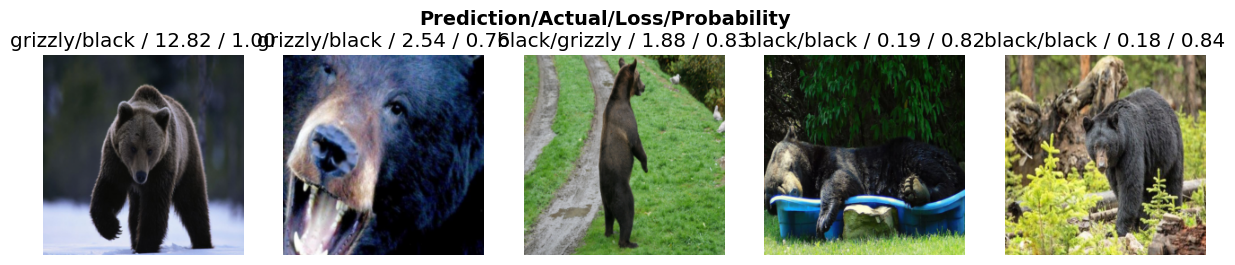

In [32]:
interp.plot_top_losses(5,nrows=1)

In [33]:
cleaner=ImageClassifierCleaner(learn)
cleaner

In [34]:
for idx in cleaner.delete():
    cleaner.fns[idx].unlink()

In [35]:
for idx,cat in cleaner.change():
    shutil.move(str(cleaner.fns[idx]),path/cat)